In [1]:
import pandas as pd
from wdlworkshop_bin import utils
import numpy as np
from sklearn.metrics import mean_squared_error

%load_ext autoreload
%autoreload 2

In [4]:
# Read Data Set
taxi_trip_duration = pd.read_csv('../data/train.csv')

In [5]:
taxi_trip_duration.head(10)

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   
5  id0801584          2  2016-01-30 22:01:40  2016-01-30 22:09:03   
6  id1813257          1  2016-06-17 22:34:59  2016-06-17 22:40:40   
7  id1324603          2  2016-05-21 07:54:58  2016-05-21 08:20:49   
8  id1301050          1  2016-05-27 23:12:23  2016-05-27 23:16:38   
9  id0012891          2  2016-03-10 21:45:01  2016-03-10 22:05:26   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   
5                6        -73.982857        40.742195         -73.992081   
6                4        -73.969017        40.757839         -73.957405   
7                1        -73.969276        40.797779         -73.922470   
8                1        -73.999481        40.738400         -73.985786   
9                1        -73.981049        40.744339         -73.973000   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435  
5         40.749184                  N            443  
6         40.765896                  N            341  
7         40.760559                  N           1551  
8         40.732815                  N            255  
9         40.789989                  N           1225

# EDA

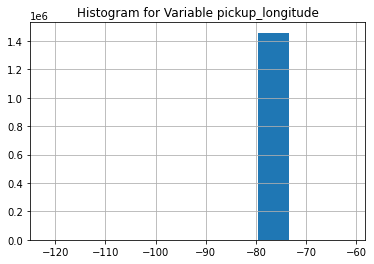

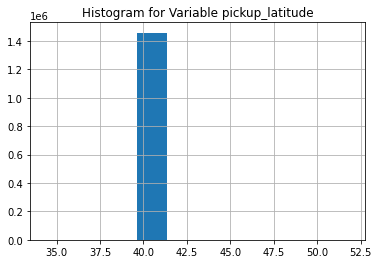

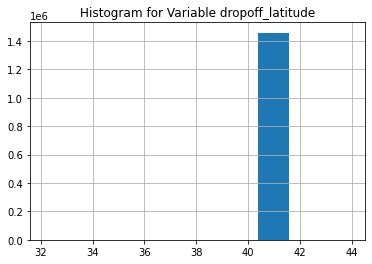

In [6]:
utils.plot_histogram(taxi_trip_duration, 'pickup_longitude')
utils.plot_histogram(taxi_trip_duration, 'pickup_latitude')
utils.plot_histogram(taxi_trip_duration, 'dropoff_latitude')

# Removing Outliers

In [7]:
print('Before removing Outliers:')
print(taxi_trip_duration.shape[0])

var_outliers = ['pickup_longitude', 'pickup_latitude', 'dropoff_latitude']
for var in var_outliers: 
    taxi_trip_duration = utils.remove_outliers(taxi_trip_duration, var, 4)
    
print('After removing Outliers:')
print(taxi_trip_duration.shape[0])

Before removing Outliers:
1458644
After removing Outliers:
1394842


# More EDA

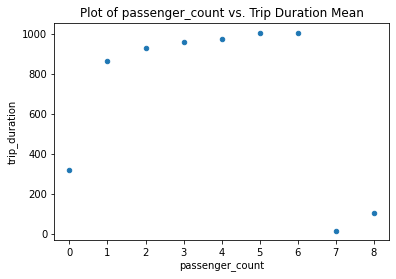

In [8]:
utils.var_x_trip_duration(taxi_trip_duration, 'passenger_count')

# Creating Time Based Features

In [9]:
taxi_trip_duration[['month','day','weekday','hour']] = (
    utils.create_time_based_features(taxi_trip_duration)
)

# Some More EDA

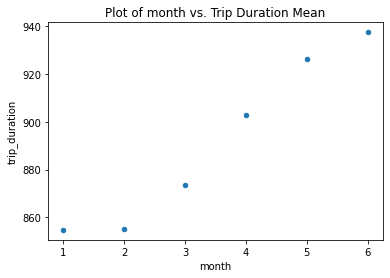

In [10]:
utils.var_x_trip_duration(taxi_trip_duration, 'month')

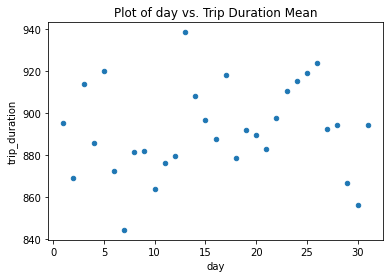

In [11]:
utils.var_x_trip_duration(taxi_trip_duration, 'day')

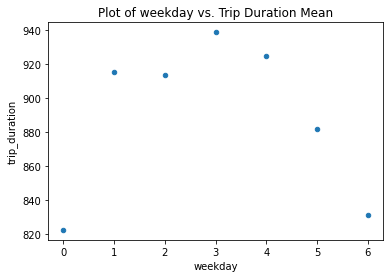

In [12]:
utils.var_x_trip_duration(taxi_trip_duration, 'weekday')

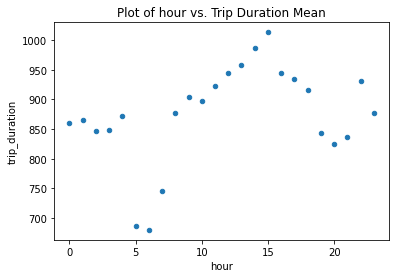

In [13]:
utils.var_x_trip_duration(taxi_trip_duration, 'hour')

# Calculate and Plot Distance Features

In [14]:
taxi_trip_duration['euclidean_distance'] = (
    utils.build_distance_features(taxi_trip_duration, 'euclidean')
)

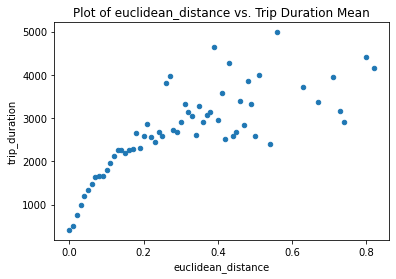

In [15]:
utils.plot_distance(taxi_trip_duration, 'euclidean_distance')

# Plot Map

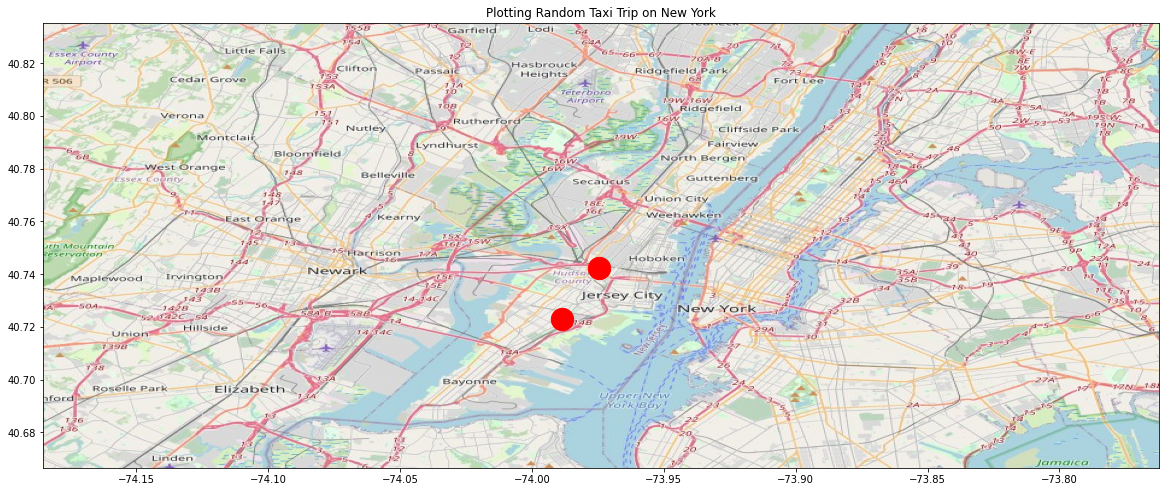

In [16]:
utils.plot_map(taxi_trip_duration, 2156)

# Model

In [17]:
features = ['vendor_id','passenger_count','month','day','weekday','hour','euclidean_distance']

In [18]:
X_train, X_test, y_train, y_test = utils.get_features_target(
    taxi_trip_duration,
    10000,
    features
)

In [21]:
rf_model = utils.perform_grid_search('rf', X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [29]:
# Extract best model and evaluate:
best_model = rf_model.best_estimator_

print('Current RMSE is {}'.format(np.sqrt(mean_squared_error(
    best_model.predict(X_test),
    y_test
))))

print('Taxi Trip Duration Mean is {}:'.format(
    taxi_trip_duration.trip_duration.mean()
))

Current RMSE is 41169.963056454384
Taxi Trip Duration Mean is 891.8321680878552:
